# **GRIP - The Sparks Foundation**

---
### **Task - Prediction using Supervised Machine Learning**

Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

Data set = http://bit.ly/w-data

# **Step 1 :**


**Importing data set and all libraries required**

In [ ]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
#Reading the Data Form Link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [ ]:
# Observe the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# To find the number of rows and columns
data.shape

(25, 2)

In [ ]:
#To find more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# To check if dataser contains any null or missing values 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Setp 2:**
**Visualizing the dataset**

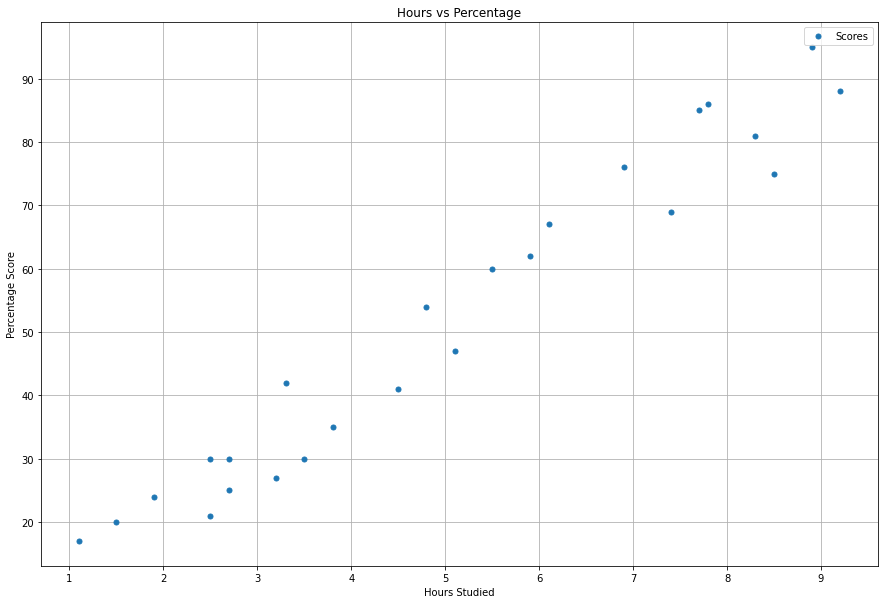

In [ ]:
#Plotting the dataset
plt.rcParams['figure.figsize'] = [15,10 ]
data.plot(x='Hours', y='Scores', style='o',markersize=5)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [ ]:
#Corr to determine the corelation between the variable 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **Setp 3 :**
**Data Preparation**

In [ ]:
# Divide the data using iloc function
x = data.iloc[: , :1 ] 
y = data.iloc[: , 1: ]

In [ ]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [ ]:
#Splitting the data into training and testing data
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

# **Step 4:**
**Training the Algorithm**

In [ ]:
model = LinearRegression()
model.fit(x_train ,y_train)

LinearRegression()

# **Setp 5 :**
**Visualizing the modle**

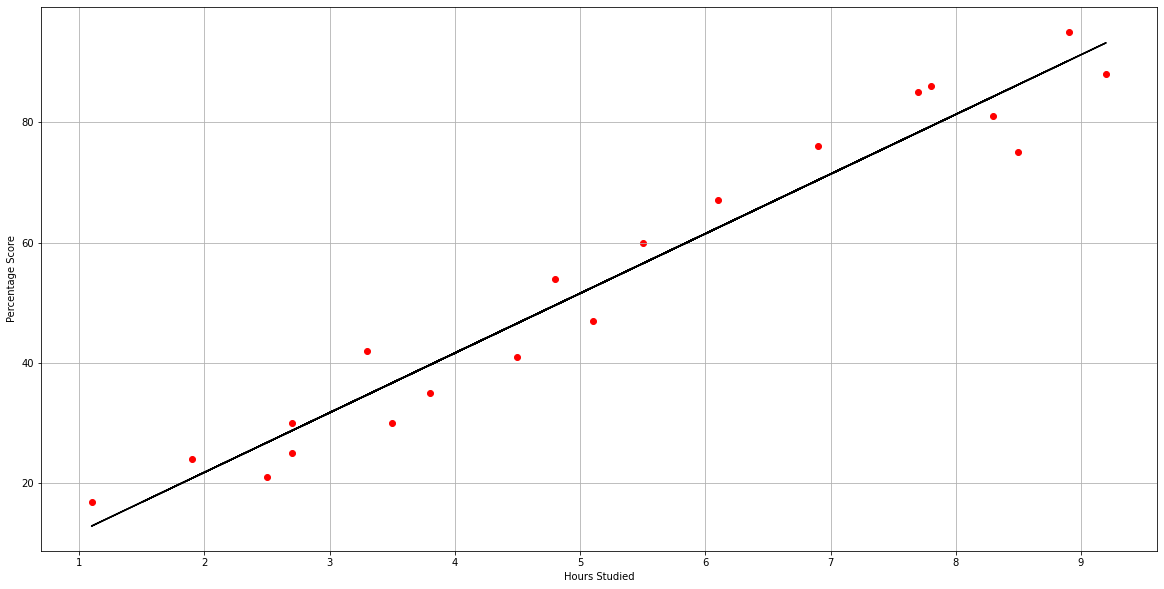

In [ ]:
line = model.coef_*x + model.intercept_

#ploting the data for training

plt.rcParams['figure.figsize'] = [20,10]
plt.scatter(x_train, y_train,color='red')
plt.plot(x,line,color='black')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()


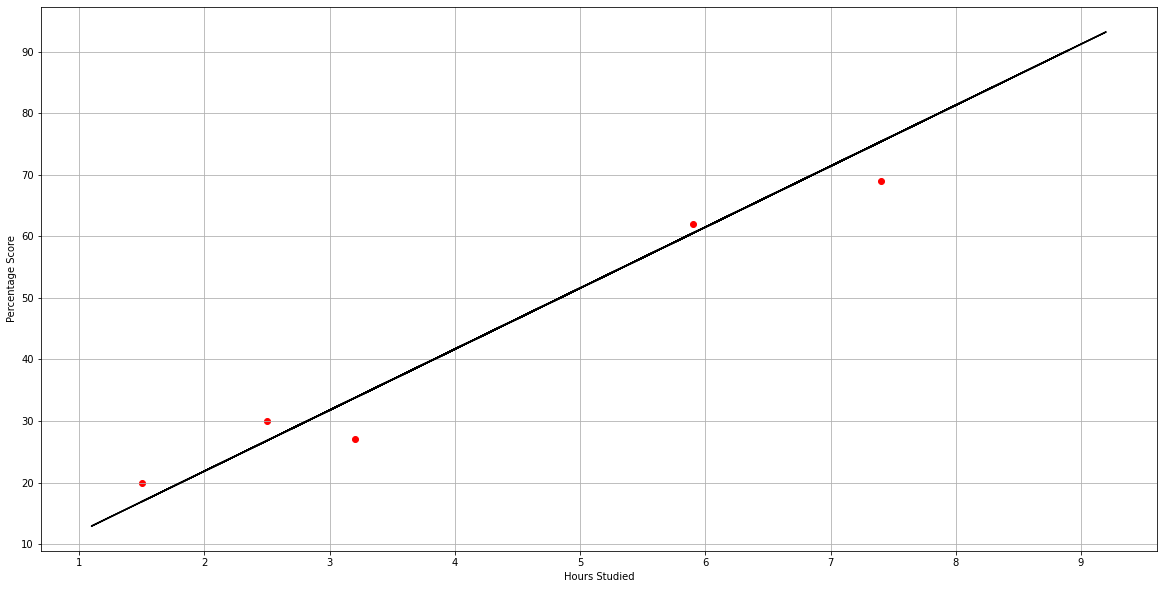

In [ ]:
# Plotting for the testing data
plt.rcParams['figure.figsize'] = [20,10]
plt.scatter(x_test, y_test,color='red')
plt.plot(x,line,color='black')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

# **Setp 6 :**
**Predictions**

In [ ]:
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
# Compare Actual data vs Predicted
print(y_test)

    Scores
5       20
2       27
19      69
16      30
11      62


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
# Testing random data
print('Score of student who studied for 9.25 hours a dat', model.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [[93.69173249]]


In [ ]:
# Compare Actual data vs Predicted
comp = pd.DataFrame({'Actual': [y_test],'Predicted': [y_pred]})
comp

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[16.884144762398023], [33.732260779489835], [..."


# **Setp 7 :**
**Evaluating the model** 

In [ ]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002982
